# Chapter 9. Plotting and Visualization
<a id='index'></a>
The simplest way to follow the code examples in the chapter is to use interactive plot‐ ting in the Jupyter notebook. 
To set this up, execute the following statement in a Jupyter notebook:

    %matplotlib notebook

In [1]:
%matplotlib notebook

## Table of Content
- [9.1 A Brief matplotlib API Primer](#91)

<hr>

## 9.1 A Brief matplotlib API Primer
<a id='91'></a>

<IPython.core.display.Javascript object>


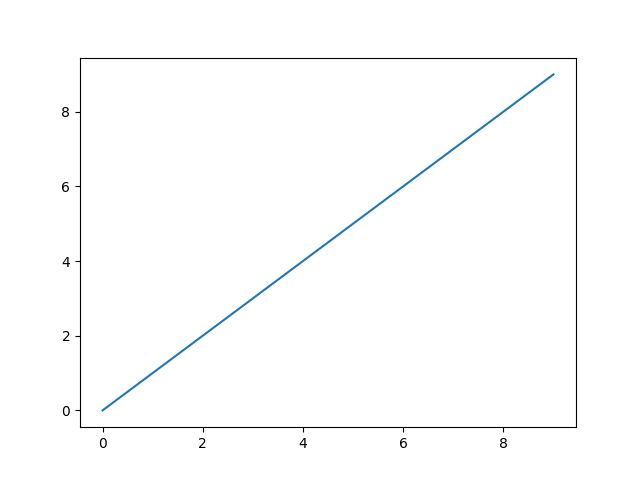

In [3]:
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(10)

plt.plot(data)

<hr>

[Back to top](#index)